In [4]:
#!git clone https://github.com/judith-tonhauser/projective-probability.git data/projective-probability/

data_dir = "data/"

In [5]:
import os
import pandas as pd

def load_norming_data(fname: str) -> pd.DataFrame:
    data = pd.read_csv(fname, index_col=0)

    data = data[~data.item.isin(["F1", "F2"])]
    
    return data.drop(columns="comments")

In [6]:
data_norming = load_norming_data(
    os.path.join(
        data_dir, 
        "projective-probability/results/1-prior/data/cd.csv")
)

data_norming

,workerid,rt,prompt,itemType,itemNr,list,item,response,fact,slide_number_in_experiment,gender,american,age,language,Answer.time_in_minutes
1,0,8398,How likely is it that Frank got a cat?,H,12,1,12H,0.83,Frank has always wanted a pet.,2,Male,0,29,english,2.08630
2,0,3505,How likely is it that Isabella ate a steak on ...,L,7,1,7L,0.14,Isabella is a vegetarian.,3,Male,0,29,english,2.08630
3,0,3526,How likely is it that Zoe calculated the tip?,H,10,1,10H,0.93,Zoe is a math major.,4,Male,0,29,english,2.08630
5,0,2414,How likely is it that Emma studied on Saturday...,L,3,1,3L,0.64,Emma is in first grade.,6,Male,0,29,english,2.08630
6,0,2540,How likely is it that Jackson ran 10 miles?,L,13,1,13L,0.25,Jackson is obese.,7,Male,0,29,english,2.08630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,94,2881,How likely is it that Emma studied on Saturday...,H,3,2,3H,0.97,Emma is in law school.,19,Female,0,39,english,1.78135
2087,94,2744,How likely is it that Olivia sleeps until noon?,L,4,2,4L,0.05,Olivia has two small children.,20,Female,0,39,english,1.78135
2088,94,2403,How likely is it that Jon walks to work?,H,19,2,19H,0.94,Jon lives 2 blocks away from work.,21,Female,0,39,english,1.78135
2089,94,2366,How likely is it that Julian dances salsa?,L,18,2,18L,0.18,Julian is German.,22,Female,0,39,english,1.78135


In [19]:
data_norming_sub = data_norming.query('item.isin(["10H", "10L"])')

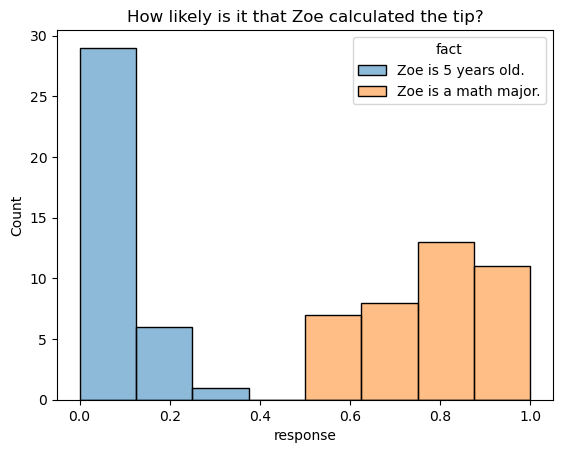

In [29]:
#| code-fold: true
#| code-description: Plotting code

from seaborn import histplot

p = histplot(
    data=data_norming_sub, x="response", hue="fact", 
    hue_order=["Zoe is 5 years old.", "Zoe is a math major."]
)

_ = p.set_title("How likely is it that Zoe calculated the tip?")

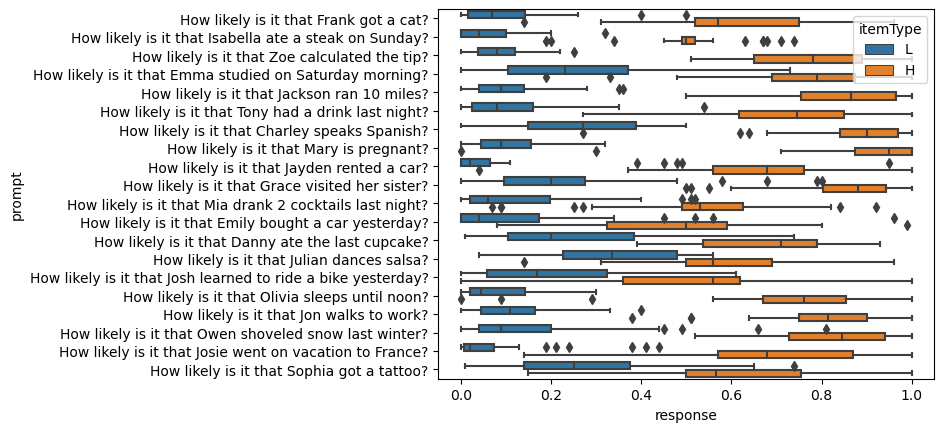

In [16]:
#| code-fold: true
#| code-description: Plotting code

from seaborn import boxplot

_ = boxplot(data_norming, y="prompt", x="response", hue="itemType", hue_order=["L", "H"])

In [4]:
import rpy2
%load_ext rpy2.ipython


`data` block

```{.stan include="models/norming-model/norming-model.stan" start-line=12 end-line=19}
```

`parameters` block

```{.stan include="models/norming-model/norming-model.stan" start-line=21 end-line=27}
```

`transformed parameters` block

```{.stan include="models/norming-model/norming-model.stan" start-line=29 end-line=33}
```

`model` block

```{.stan include="models/norming-model/norming-model.stan" start-line=35 end-line=48}
```

`generated quantities` block

```{.stan include="models/norming-model/norming-model.stan" start-line=50 end-line=64}
```

# Projection Data

In [32]:
def load_projection_data(fname: str) -> pd.DataFrame:
    data = pd.read_csv(fname, index_col=0).drop(columns="comments")

    data = data[data.trigger_class != "control"]

    data["itemType"] = data.fact_type.str.replace("fact", "")
    data["item"] = data.contentNr.astype(str) + data.fact_type.str.replace("fact", "")
    
    return data

In [33]:
data_projection = load_projection_data(
    os.path.join(
        data_dir, 
        "projective-probability/results/3-projectivity/data/cd.csv"
    )
)

data_projection

,workerid,rt,subjectGender,speakerGender,content,verb,fact,fact_type,contentNr,trigger_class,...,slide_number_in_experiment,age,language,assess,american,gender,Answer.time_in_minutes,assignmentid,itemType,item
3,0,3495,M,M,Emily bought a car yesterday,establish,Emily has been saving for a year,factH,8,NonProj,...,4,38,english,Yes,m,m,2.0626,3PIWWX1FJJ78V5N7WBELSYK9QJBJJ3,H,8H
4,0,3866,F,M,Frank got a cat,prove,Frank has always wanted a pet,factH,12,C,...,5,38,english,Yes,m,m,2.0626,3PIWWX1FJJ78V5N7WBELSYK9QJBJJ3,H,12H
5,0,2983,F,F,Charley speaks Spanish,reveal,Charley lives in Mexico,factH,20,NonProj,...,6,38,english,Yes,m,m,2.0626,3PIWWX1FJJ78V5N7WBELSYK9QJBJJ3,H,20H
6,0,4669,F,F,Jon walks to work,confirm,Jon lives 10 miles away from work,factL,19,C,...,7,38,english,Yes,m,m,2.0626,3PIWWX1FJJ78V5N7WBELSYK9QJBJJ3,L,19L
7,0,3847,M,F,Mia drank 2 cocktails last night,acknowledge,Mia is a college student,factH,6,C,...,8,38,english,Yes,m,m,2.0626,3PIWWX1FJJ78V5N7WBELSYK9QJBJJ3,H,6H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,299,11176,F,F,Jackson ran 10 miles,see,Jackson is obese,factL,13,NonProj,...,19,44,English,Yes,m,m,8.1216,3GA6AFUKOOP1JLQS5QJD0EN5HUOH3N,L,13L
7795,299,12196,F,F,Josh learned to ride a bike yesterday,reveal,Josh is a 75-year old man,factL,16,NonProj,...,22,44,English,Yes,m,m,8.1216,3GA6AFUKOOP1JLQS5QJD0EN5HUOH3N,L,16L
7797,299,5205,M,F,Isabella ate a steak on Sunday,confirm,Isabella is from Argentina,factH,7,C,...,24,44,English,Yes,m,m,8.1216,3GA6AFUKOOP1JLQS5QJD0EN5HUOH3N,H,7H
7799,299,10590,M,M,Grace visited her sister,annoyed,Grace loves her sister,factH,9,NonProj,...,26,44,English,Yes,m,m,8.1216,3GA6AFUKOOP1JLQS5QJD0EN5HUOH3N,H,9H


In [42]:
data_projection_pretend = data_projection.query("verb == 'pretend'")

data_projection_pretend[["verb", "itemType", "content", "fact", "response"]].head()

,verb,itemType,content,fact,response
21,pretend,L,Owen shoveled snow last winter,Owen lives in New Orleans,0.22
35,pretend,L,Jackson ran 10 miles,Jackson is obese,0.05
60,pretend,H,Danny ate the last cupcake,Danny loves cake,0.03
98,pretend,H,Josh learned to ride a bike yesterday,Josh is a 5-year old boy,0.55
118,pretend,H,Tony had a drink last night,Tony really likes to party with his friends,0.43


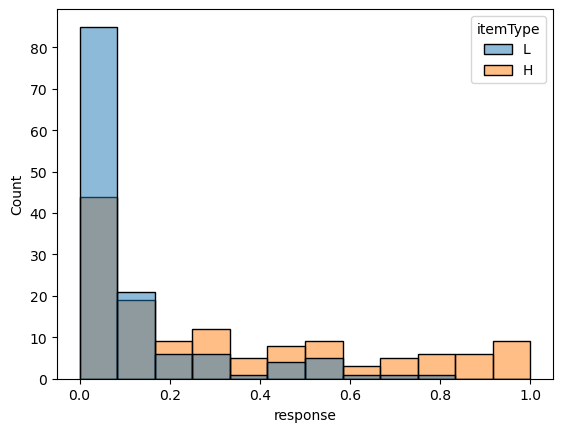

In [38]:
#| code-fold: true
#| code-description: Plotting code

p = histplot(
    data=data_projection_pretend, x="response", hue="itemType", 
    hue_order=["L", "H"]
)

In [41]:
data_projection_know = data_projection.query("verb == 'know'")

data_projection_know[["verb", "itemType", "content", "fact", "response"]].head()

,verb,itemType,content,fact,response
15,know,L,Danny ate the last cupcake,Danny is a diabetic,0.97
27,know,H,Owen shoveled snow last winter,Owen lives in Chicago,0.12
55,know,H,Sophia got a tattoo,Sophia is a hipster,0.04
83,know,H,Jackson ran 10 miles,Jackson is training for a marathon,0.74
121,know,L,Frank got a cat,Frank is allergic to cats,0.61


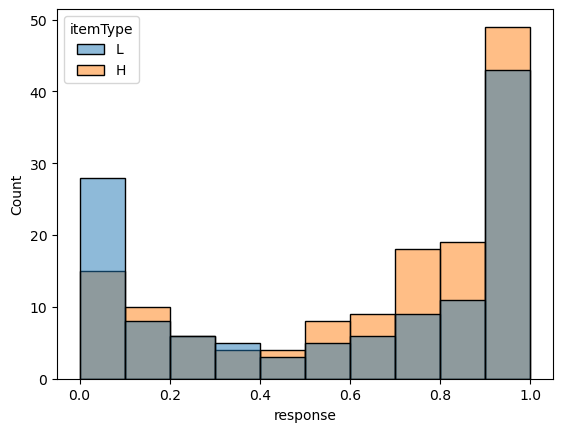

In [43]:
#| code-fold: true
#| code-description: Plotting code

p = histplot(
    data=data_projection_know, x="response", hue="itemType", 
    hue_order=["L", "H"]
)

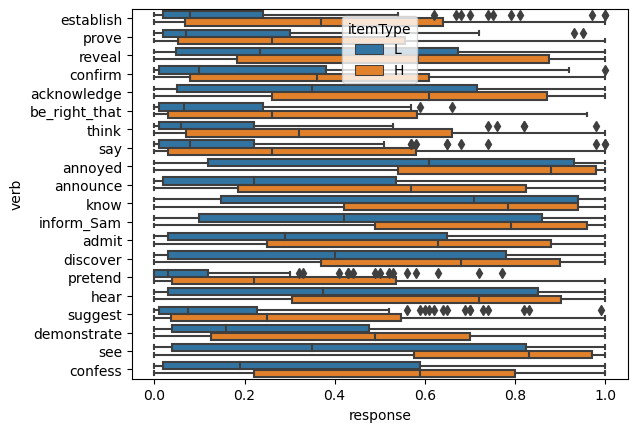

In [34]:
#| code-fold: true
#| code-description: Plotting code

_ = boxplot(data_projection, y="verb", x="response", hue="itemType", hue_order=["L", "H"])

$$\begin{align*}
\rho^\text{(verb)}_v &\sim \mathcal{N}(0, \sigma_\text{verb})\\
\rho^\text{(context)}_c &\sim \mathcal{N}\left(\mu^\text{(context)}_c, \sigma^\text{(context)}_c\right)\\
\rho^\text{(subj-verb)}_s &\sim \mathcal{N}(0, \sigma_\text{subj-verb})\\
\rho^\text{(subj-context)}_s &\sim \mathcal{N}(0, \sigma_\text{subj-context})\\
\end{align*}$$

where each of the standard deviations are distributed exponential.

$$\begin{align*}
\sigma_\text{verb} &\sim \text{Exponential}(1)\\
\sigma_\text{subj-verb} &\sim \text{Exponential}(1)\\
\sigma_\text{subj-context} &\sim \text{Exponential}(1)\\
\end{align*}$$

`data` block

```{.stan include="models/projection-model/data-block.stan"}
```

```{.stan include="models/projection-model/context-discrete/context-discrete-likelihoods.stan"}
```



In [ ]:
parameters_and_model_block_files = {
    "no_priors_fixed": "parameters-and-model-block.stan",
    "verb_priors_fixed": "parameters-and-model-block-verb-prior-fixed.stan",
    "context_priors_fixed": "parameters-and-model-block-context-prior-fixed.stan",
    "both_priors_fixed": "parameters-and-model-block-context-and-verb-priors-fixed.stan",
}

### No fixed priors

`parameters` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block.stan" start-line=1 end-line=11}
```

`transformed parameters` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block.stan" start-line=13 end-line=40}
```

`model` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block.stan" start-line=42 end-line=61}
```

### Fixed context priors

`parameters` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block-context-prior-fixed.stan" start-line=1 end-line=10}
```

`transformed parameters` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block-context-prior-fixed.stan" start-line=12 end-line=39}
```

`model` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block-context-prior-fixed.stan" start-line=41 end-line=60}
```

### Fixed verb priors

`parameters` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block-verb-prior-fixed.stan" start-line=1 end-line=10}
```

`transformed parameters` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block-verb-prior-fixed.stan" start-line=12 end-line=39}
```

`model` block

```{.stan include="models/projection-model/parameters-and-model-block/parameters-and-model-block-verb-prior-fixed.stan" start-line=41 end-line=60}
```

`generated quantities` block

```{.stan include="models/projection-model/generated-quantities-block.stan"}
```

# Bleached

In [68]:
data_projection_bleached = load_projection_data(
    os.path.join(
        data_dir, 
        "projective-probability-replication/bleached.csv"
    )
)

data_projection_bleached["workerid"] = data_projection_bleached.participant

data_projection_bleached

,slide_number_in_experiment,verb,contentNr,content,speakerGender,fact,fact_type,utterance,question,subjectGender,speakerName,subjectName,trigger_class,response,rt,participant,item,workerid
0,2,inform_Sam,11,that thing happened,F,Danny is a diabetic,factL,Did Amanda inform Sam that a particular thing ...,11,F,Donna,Shirley,C,0.00,15699,1,11L,1
3,5,confirm,13,that thing happened,F,Jackson is training for a marathon,factH,Did Laura confirm that a particular thing happ...,13,F,Nancy,Janet,C,0.00,6903,1,13H,1
4,6,be_right_that,20,that thing happened,F,Charley lives in Mexico,factH,Is Anna right that a particular thing happened?,20,F,Carol,Nicole,C,0.00,4640,1,20H,1
5,7,prove,3,that thing happened,F,Emma is in law school,factH,Did Justin prove that a particular thing happe...,3,M,Lisa,Brandon,C,0.00,5977,1,3H,1
6,8,admit,2,that thing happened,F,Josie doesn't have a passport,factL,Did Scott admit that a particular thing happened?,2,M,Jennifer,Nicholas,C,0.49,7887,1,2L,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,23,discover,1,that thing happened,F,Mary is taking a prenatal yoga class,factH,Did Patrick discover that a particular thing h...,1,M,Carol,Gregory,NonProj,0.82,2665,50,1H,50
22,24,suggest,19,that thing happened,M,Jon lives 2 blocks away from work,factH,Did Ruth suggest that a particular thing happe...,19,F,Robert,Anna,C,0.73,2619,50,19H,50
23,25,confirm,9,that thing happened,M,Grace loves her sister,factH,Did Andrew confirm that a particular thing hap...,9,M,James,Tyler,C,0.68,1120,50,9H,50
24,26,hear,11,that thing happened,F,Danny is a diabetic,factL,Did Amanda hear that a particular thing happened?,11,F,Jennifer,Diane,C,0.70,1824,50,11L,50


# Templatic

In [79]:
data_projection_templatic = load_projection_data(
    os.path.join(
        data_dir, 
        "projective-probability-replication/templatic.csv"
    )
)

data_projection_templatic["workerid"] = data_projection_templatic.participant

data_projection_templatic

,slide_number_in_experiment,verb,contentNr,content,speakerGender,fact,fact_type,utterance,question,subjectGender,speakerName,subjectName,trigger_class,response,rt,participant,item,workerid
0,2,prove,11,X happened,M,Danny loves cake,factH,Did Amanda prove that X happened?,11,F,William,Nicole,C,0.58,2892,1,11H,1
1,3,annoyed,7,X happened,F,Isabella is a vegetarian,factL,Is Kevin annoyed that X happened?,7,M,Margaret,Jeffrey,NonProj,0.47,1876,1,7L,1
2,4,discover,14,X happened,F,Jayden's car is in the shop,factH,Did Stephanie discover that X happened?,14,F,Karen,Amanda,NonProj,0.67,1854,1,14H,1
3,5,acknowledge,3,X happened,M,Emma is in law school,factH,Did Justin acknowledge that X happened?,3,M,Mark,Gary,C,0.72,2423,1,3H,1
4,6,pretend,9,X happened,M,Grace loves her sister,factH,Did Andrew pretend that X happened?,9,M,Christopher,Justin,NonProj,0.67,9479,1,9H,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,22,reveal,20,X happened,F,Charley lives in Korea,factL,Did Anna reveal that X happened?,20,F,Kimberly,Rebecca,NonProj,0.82,1877,50,20L,50
22,24,discover,12,X happened,M,Frank has always wanted a pet,factH,Did Melissa discover that X happened?,12,F,Robert,Rachel,NonProj,0.84,1783,50,12H,50
23,25,admit,16,X happened,M,Josh is a 5-year old boy,factH,Did Sharon admit that X happened?,16,F,William,Anna,C,0.56,2008,50,16H,50
24,26,confirm,4,X happened,M,Olivia has two small children,factL,Did Jerry confirm that X happened?,4,M,George,Nicholas,C,0.78,2149,50,4L,50
